## Task 2-Prediction Using Unsuperwised machine learning Algorithm

## name: Kalyani Bharat Kare

## Iris Dataset

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")


### problem Statement

### predict the optimum number of clusters and represent it visually.

## Data Gathering

In [2]:
iris=datasets.load_iris()
iris_data=pd.DataFrame(iris.data,columns=iris.feature_names)
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:>

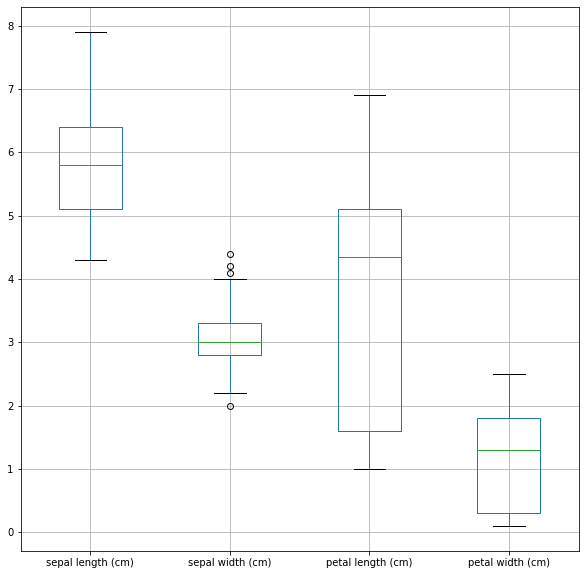

In [4]:
plt.figure(figsize=(10,10))
iris_data.boxplot()

<AxesSubplot:>

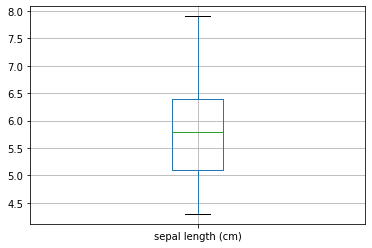

In [8]:
iris_data[['sepal length (cm)']].boxplot()

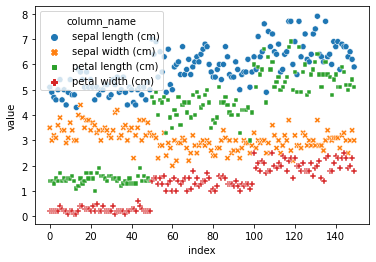

In [4]:
df_inv=iris_data.reset_index()
columns=['index','sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
df_to_plot=df_inv[columns]

df_to_plot=pd.melt(frame=df_to_plot,
                  id_vars="index",
                  var_name="column_name",
                  value_name="value")

fig,ax=plt.subplots()
sns.scatterplot(ax=ax,data=df_to_plot,x="index",y="value",style="column_name",hue="column_name")
plt.show()

In [17]:
kmean_model=KMeans(n_clusters=3,random_state=11)
kmean_model.fit(iris_data)

y_pred=kmean_model.fit_predict(iris_data)



In [13]:
wcss_list=[]
k_value=range(1,10)
for i in k_value:
    kmean_model=KMeans(n_clusters=i,random_state=11)
    kmean_model.fit(iris_data)
    wcss=kmean_model.inertia_
    wcss_list.append(wcss)
    
    print(i, ">>" ,wcss)
    

1 >> 681.3706000000001
2 >> 152.34795176035792
3 >> 78.85144142614602
4 >> 57.22847321428572
5 >> 46.44618205128205
6 >> 39.03998724608725
7 >> 34.29822966507177
8 >> 30.282172305764416
9 >> 28.167275034906613


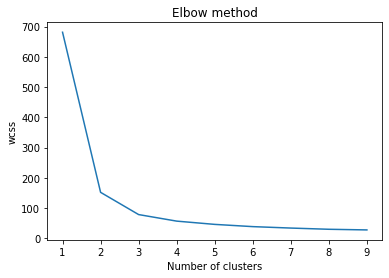

In [14]:
plt.plot(k_value,wcss_list)
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.title("Elbow method")
plt.savefig("Elbow_method1.png")